In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
data = pd.read_csv('../../datasets/Advertising Budget and Sales.csv')

print(data.shape)
print(data.head())

(200, 5)
   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


In [23]:
# drop the unnamed column

data = data.drop(columns=['Unnamed: 0'])
print(data.head())


   TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  Sales ($)
0             230.1                 37.8                     69.2       22.1
1              44.5                 39.3                     45.1       10.4
2              17.2                 45.9                     69.3        9.3
3             151.5                 41.3                     58.5       18.5
4             180.8                 10.8                     58.4       12.9


In [24]:
data.shape

(200, 4)

In [25]:
# rename features to easier names

data = data.rename(columns={
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales',
    })
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
# No null values in the dataset

check_na_rows = data.isna().any(axis=1).any()
check_na_rows

np.False_

Correlation between TV ads and sales: 0.78
Correlation between Radio ads and sales: 0.58
Correlation between Newspaper ads and sales: 0.23


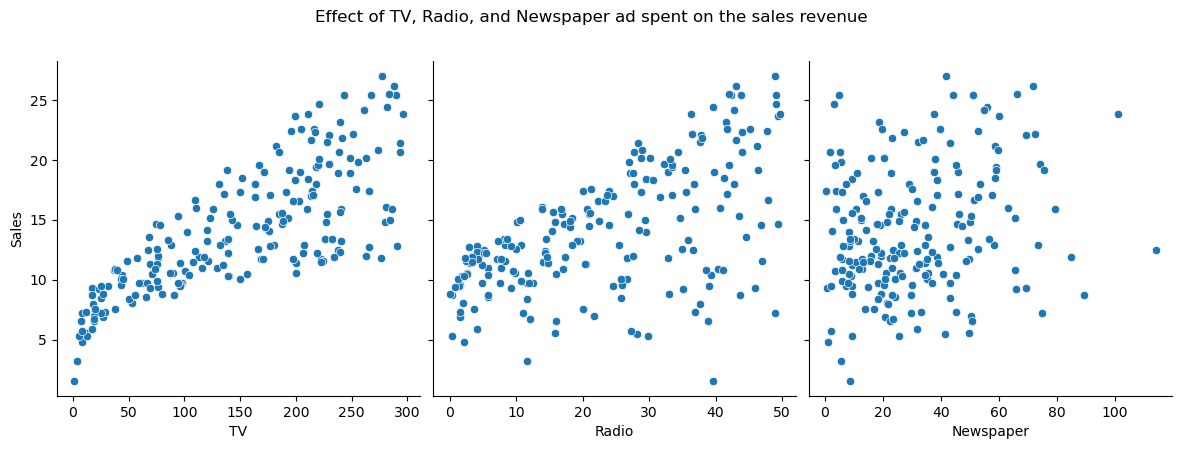

In [27]:
# scatter plot of the TV, Radio, and Newspaper and the sales
# from the visaul inspection of the scatter plot, we can see that TV is most correlated with output.
# meaning that an increase in the TV budget, led to the highest rise in the sales revenue
# second after the TV ads, is Radio ads.
# last, is the Newspaper ads.

pairplot = sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)

pairplot.figure.suptitle('Effect of TV, Radio, and Newspaper ad spent on the sales revenue', y='1.1')

correlation_between_tv_sales = data['TV'].corr(data['Sales']).round(2)
correlation_between_radio_sales = data['Radio'].corr(data['Sales']).round(2)
correlation_between_newspaper_sales = data['Newspaper'].corr(data['Sales']).round(2)


print(f'Correlation between TV ads and sales: {correlation_between_tv_sales}')
print(f'Correlation between Radio ads and sales: {correlation_between_radio_sales}')
print(f'Correlation between Newspaper ads and sales: {correlation_between_newspaper_sales}')

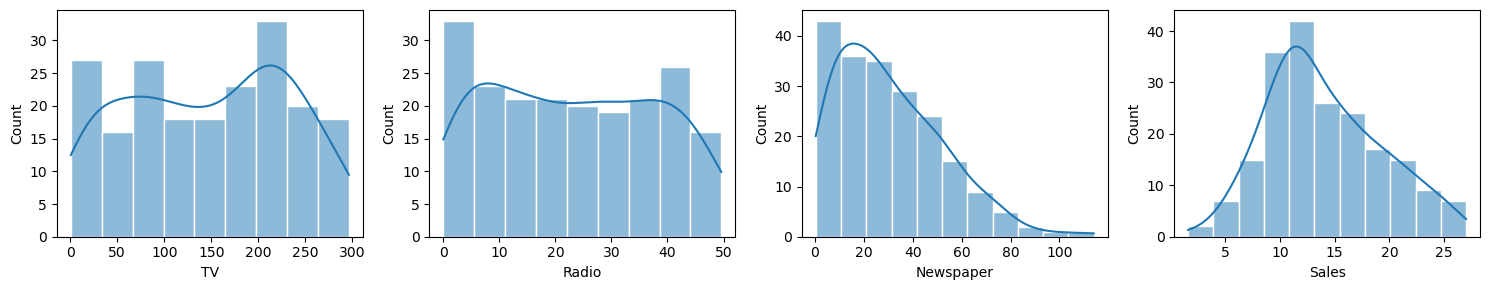

In [61]:
# histograms of the features (TV ad budget, Radio ad budget, and Newspaper ad budget) and the output (Sales revenue)
# the TV ad sales are uniformly distributed across its values
# same with the Radio ad sales
# we see that Newspaper ad budget is right skewed. most of the newspaper is around the lowed end (0 to 50 approximately).

figure, axes = plt.subplots(1, 4)
figure.set_size_inches(15, 3)

tv_histogram = sns.histplot(data['TV'], ax = axes[0], kde=True, edgecolor='white')
radio_histogram = sns.histplot(data['Radio'], ax=axes[1], kde=True, edgecolor='white')
newspaper_histogram = sns.histplot(data['Newspaper'], ax=axes[2], kde=True, edgecolor='white')
sales_histogram = sns.histplot(data['Sales'], ax=axes[3], kde=True, edgecolor='white')
plt.tight_layout()

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


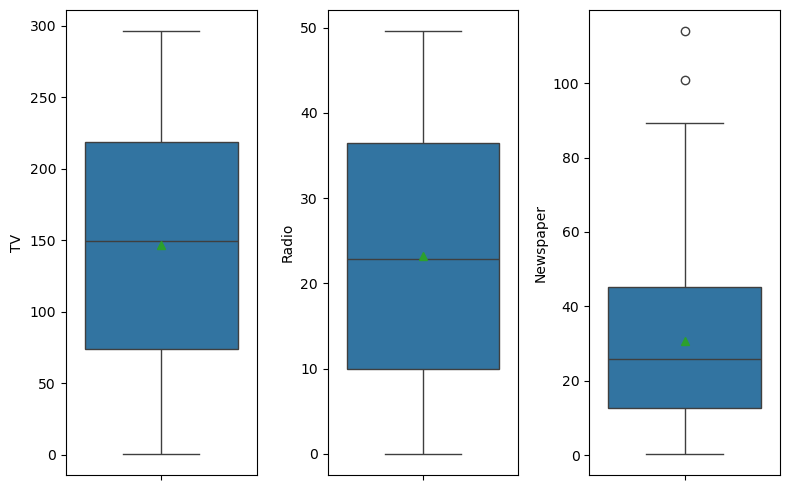

In [29]:
# using boxplot to check outliers
# there no considerable number of outliers in the features(columns) of this dataset

print(data.describe())

fig, axs = plt.subplots(1, 3, figsize = (8,5))

plt1 = sns.boxplot(data['TV'], ax = axs[0], showmeans=True)
plt2 = sns.boxplot(data['Radio'], ax = axs[1], showmeans=True)
plt3 = sns.boxplot(data['Newspaper'], ax = axs[2], showmeans=True)

fig.tight_layout()

correlation among the features:

	tv and radio:  0.05480866446583011
	tv and newspaper:  0.05664787496505703

correlation between each feature and the target:

	tv and sales:  0.7822244248616064
	radio and sales:  0.5762225745710553
	newspaper and sales:  0.22829902637616534


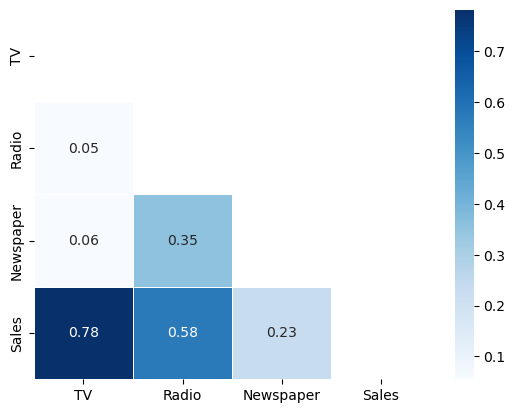

In [30]:
# check correlation among the features(predictors) and between the features and the target
# note: correlation is symmetric. ie: corr(tv, radio) is the same as corr(radio, tv)

tv_radio_correlation = data['TV'].corr(data['Radio'])
tv_newspaper_correlation = data['TV'].corr(data['Newspaper'])

print('correlation among the features:\n')
print('\ttv and radio: ', tv_radio_correlation)
print('\ttv and newspaper: ', tv_newspaper_correlation)

tv_sales_correlation = data['TV'].corr(data['Sales'])
radio_sales_correlation = data['Radio'].corr(data['Sales'])
newspaper_sales_correlation = data['Newspaper'].corr(data['Sales'])

print('\ncorrelation between each feature and the target:\n')

print('\ttv and sales: ', tv_sales_correlation)
print('\tradio and sales: ', radio_sales_correlation)
print('\tnewspaper and sales: ', newspaper_sales_correlation)


correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix))  # to hide the upper triangle of the correlation matrix. remove mask parametr from the heatmap to see differance
sns.heatmap(data=correlation_matrix, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5, mask=mask);

In [31]:
# prepare the data for learning 

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, shuffle=True, random_state=100)


# apply lienar regression and learn using traing data

lr = LinearRegression().fit(X_train, y_train)

coeff = lr.coef_
intercept = lr.intercept_

print('coefficients of TV, Radio, and Newspaper:', coeff)
print('y intercept: ', intercept)


# using the linear regression to predict the test data
y_predicted = lr.predict(X_test)

coefficients of TV, Radio, and Newspaper: [0.0454256  0.18975773 0.00460308]
y intercept:  2.652789668879496


##### Cost functions:
1. Mean Squared Errror:\
    Calculates the average of the squared differences between predicted and actual values.
    * Advantages:
        * Penalizes larger errors more heavily
    * Disadvantages:
        * Not in the original unit of the target variable, making it less intuitive to interpret.
        * Sensitive to outliers due to the squaring of errors.
2. Root Mean Squared Error:\
    Square root of Mean Squared Error
    * Advantages:
        * Easier to interpret than MSE because it's in the original units of the data. 
        * Still penalizes larger errors, but in a more interpretable way. 
    * Disadntages:
        * Also sensitive to outliers, though the square root operation may reduce the impact of extreme values compared to MSE.
        
3. Mean Absolute ERror:\
    Calculates the average of the absolute differences between predicted and actual values.
    * Advantages:
        * More robust to outliers than MSE and RMSE.
        * Easier to understand the magnitude of the average error
    * Disadantages:
        * Treats all errors equally, regardless of their magnitude. A large error is weighted the same as a small error
        * Sensitive to the scale of the target variable. If the scale changes, the MAE value will change as well. 

In [32]:
# cost functions:
# 1. Mean squared error: Most common cost function. Penalizes larger errors more heavily. 
# 2. Root mean squared error: square root of MSE. the same unit of the data
# 3. Mean Absolute Error: is a better choice the outliers in the data are a concern


mse = (1 / len(y_test)) * np.sum((y_predicted - y_test) ** 2)
mae = (1 / len(y_test) * np.sum(np.abs(y_predicted - y_test)))

print(mse)
print(np.sqrt(mse))
print(mae)

print()

mse2 = mean_squared_error(y_true=y_test, y_pred=y_predicted)
rmse = root_mean_squared_error(y_true= y_test, y_pred=y_predicted)
mae = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print('Mean square error: ', mse2)
print('Root mean square error: ', rmse)
print('Mean Absolute Error: ', mae)

1.8506819941636947
1.3603977338130546
1.0638483124072022

Mean square error:  1.8506819941636947
Root mean square error:  1.3603977338130546
Mean Absolute Error:  1.0638483124072022


In [33]:
# score functions
# R2 score:
#           statistical measure that represents the proportion of variance in the dependent variable
#           that is explained by the independent variable(s) in a regression model
#           in this case, it measure the proportion of variance in the target variable (sales), that is explained by 
#           the TV feature in our linear regression model
# R2 score ranges from 0 (the model doesn't explain any variance at all), to 1 (the model explains all the variance perfectly)
# A higher R² value indicates a better fit, meaning the model captures more of the variance in the dependent variable. 
# R2 = 1 - (SSR / SST), where: 
#       SSR (Sum of Squared Regression) is the sum of the squared differences between predicted and actual values. 
#       SST (Total Sum of Squares) is the sum of the squared differences between actual values and the mean of the actual values. 
# 0.9 is a good value indicating that the model effectively captured the relationship between the features and the target

r2 = r2_score(y_true = y_test, y_pred = y_predicted)
mse = mean_squared_error(y_true = y_test, y_pred = y_predicted)
print('R2 score: ', r2)
print('Mean Squared Error: ', mse)

R2 score:  0.9058622107532246
Mean Squared Error:  1.8506819941636947


<Axes: xlabel='Sales', ylabel='Count'>

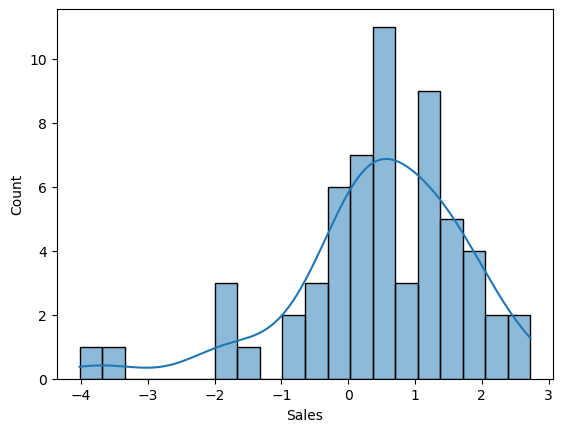

In [36]:
# distribution of the error terms
# we need to check if the error terms are also normally distributed (which is in fact, one of the major assumptions of linear regression)
# let us plot the histogram of the error terms and see what it looks like.
# the error plot is indeed normally distributed

err = y_test - y_predicted
sns.histplot(err, kde=True, bins=20)